In [3]:
import pandas as pd
import numpy as np
import matplotlib as mlp
from matplotlib import pyplot as plt 
!pip install seaborn
import seaborn as sb

import warnings
import wordcloud
import json
import datetime
from collections import Counter


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
df = pd.read_csv("USvideos.csv")
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sb.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [5]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [6]:
df["description"] = df["description"].fillna(" ")

In [7]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


In [8]:
def contains_capitalized_words(s):
    for w in s.split():
        if w.isupper():
            return True
    return False

In [9]:
df["capitalized_words"] = df["title"].apply(contains_capitalized_words)
value_counts = df["capitalized_words"].value_counts().to_dict()

<Axes: title={'center': 'Titles with the capital words'}>

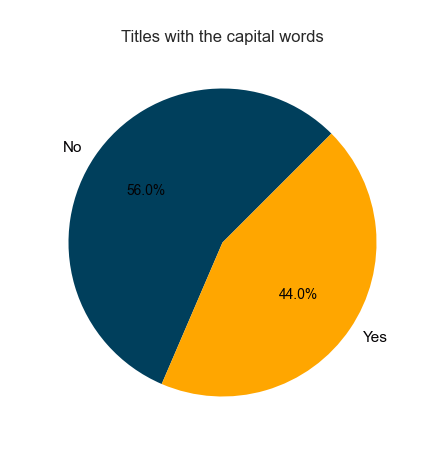

In [10]:
df["capitalized_words"].value_counts().plot.pie(
    labels = ["No", "Yes"],
    autopct = "%1.1f%%",
    colors = ['#003f5c', '#ffa600'],
    textprops = {'color': '#040204'},
    startangle = 45,
    title = "Titles with the capital words",
    ylabel = ""
)

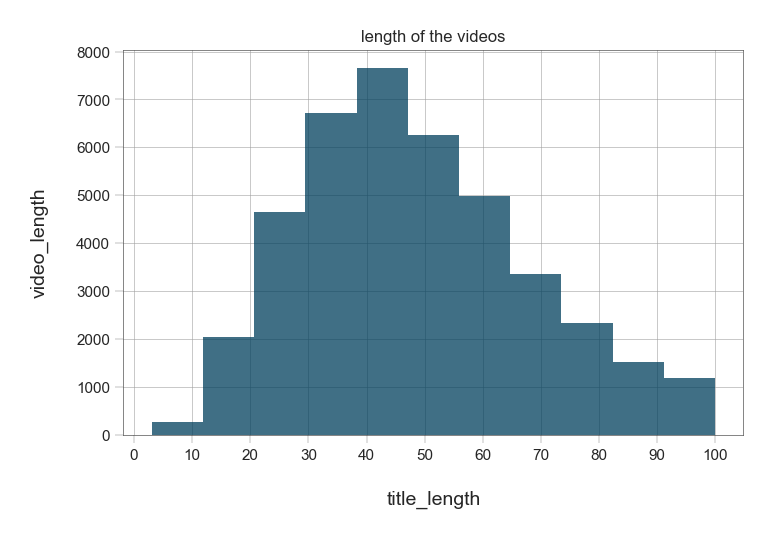

In [11]:
df["title_length"] = df["title"].apply(len)

sb.histplot(data = df, x = "title_length", color="#003f5c", bins= 11)
plt.xlabel("title_length")
plt.ylabel("video_length")
plt.title("length of the videos")
plt.xticks(range(0,110,10))
plt.show()

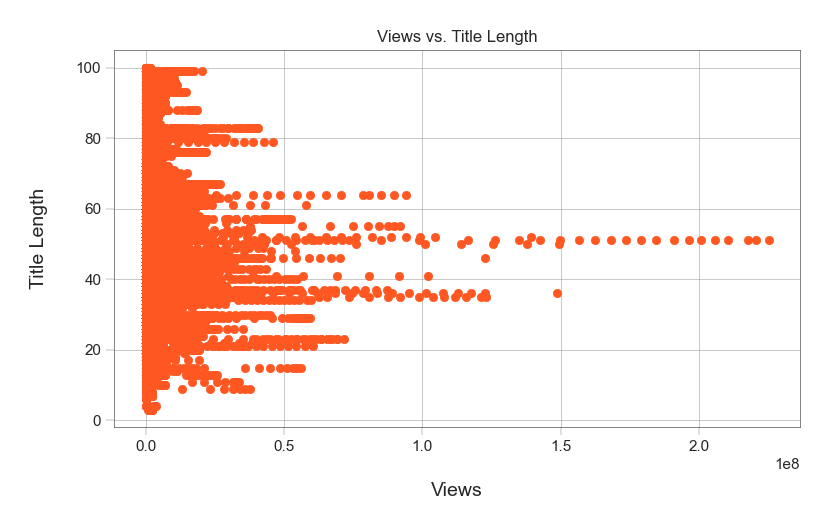

In [12]:
fig , ax = plt.subplots()
ax.scatter(
    df["views"],
    df["title_length"],
    color = "#FF5722",
    linewidths=0.5
)
ax.set_xlabel("Views")
ax.set_ylabel("Title Length")
ax.set_title("Views vs. Title Length")
plt.tight_layout()
plt.show()

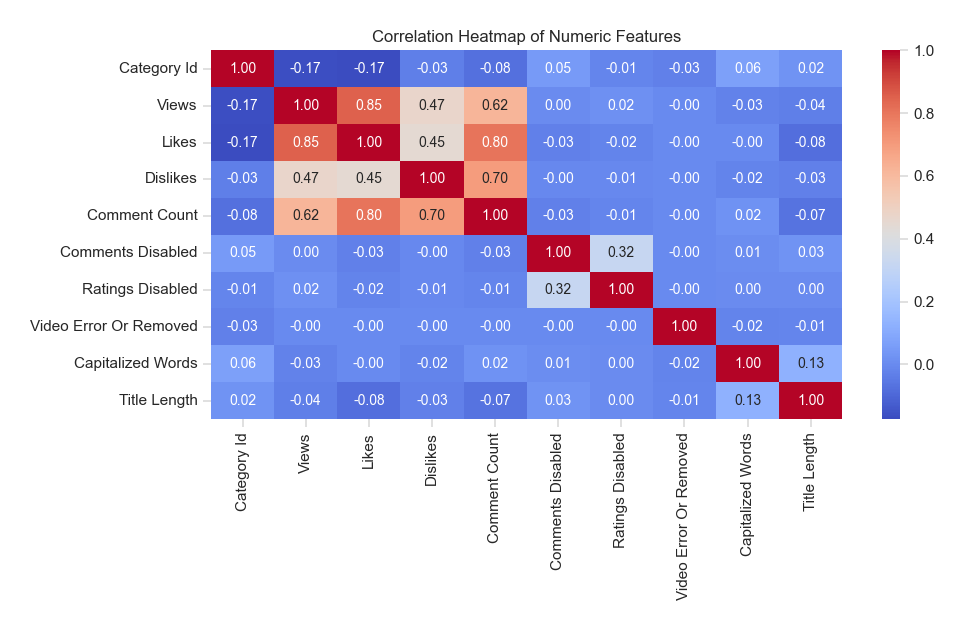

In [13]:
numeric_cols = df.select_dtypes(include=['number', 'bool'])
h_labels = [col.replace("_", " ").title() for col in numeric_cols.columns]

plt.figure(figsize=(10,6))
sb.heatmap(
    numeric_cols.corr(),
    annot=True,
    xticklabels=h_labels,
    yticklabels=h_labels,
    cmap = "coolwarm",
    fmt = ".2f"
)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

In [14]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,capitalized_words,title_length
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,True,34
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",True,62
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,False,53
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,False,32
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,True,24


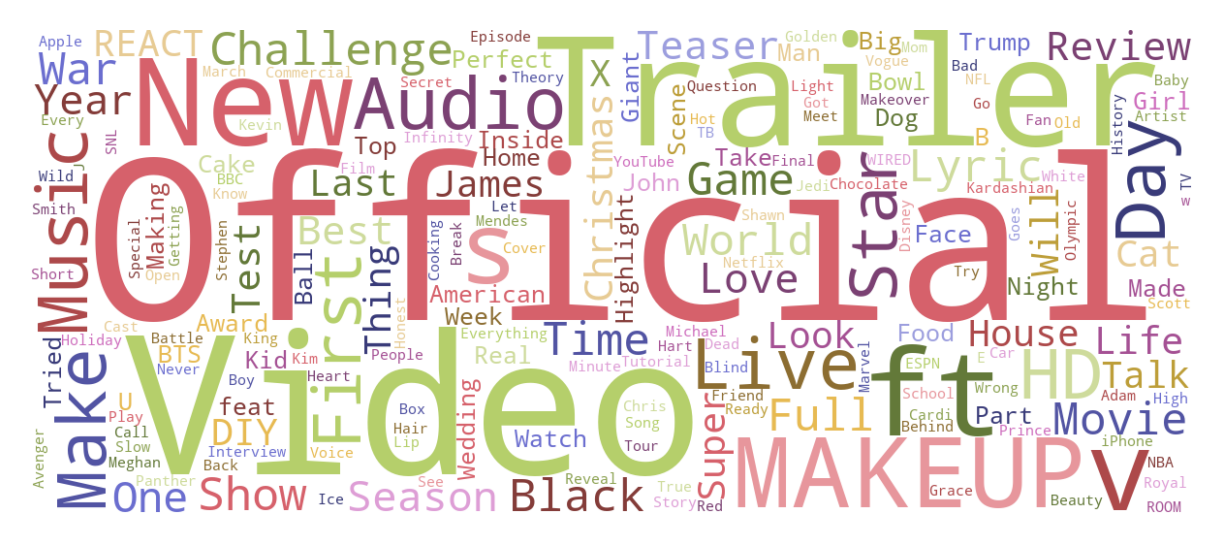

In [15]:
from wordcloud import WordCloud

words = " ".join(df["title"].str.split().sum())
wc = WordCloud(width=1200, height=500, background_color="white", collocations=False, colormap="tab20b").generate(words)

plt.figure(figsize=(15,12))
plt.imshow(wc,interpolation="bilinear" )
plt.axis("off")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
df = pd.read_csv("USvideos.csv")
df = df[["title", "views"]]
df.dropna(inplace=True)

In [19]:
df.head()

,title,views
0,WE WANT TO TALK ABOUT OUR MARRIAGE,748374
1,The Trump Presidency: Last Week Tonight with J...,2418783
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",3191434
3,Nickelback Lyrics: Real or Fake?,343168
4,I Dare You: GOING BALD!?,2095731


In [20]:
df["viral"] = df["views"].apply(lambda x: 1 if x > 1_000_000 else 0)


In [44]:
X = df["title"]
y = df["viral"]

tfidf = TfidfVectorizer(max_features=5000, stop_words="english")
X_tfidf = tfidf.fit_transform(df['title'])

In [45]:
X_test, X_train, y_test, y_train = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_pred = model.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred))
print( classification_report(y_test, y_pred))

Accuracy 0.815348453860008
              precision    recall  f1-score   support

           0       0.80      0.92      0.86     19711
           1       0.84      0.66      0.74     13048

    accuracy                           0.82     32759
   macro avg       0.82      0.79      0.80     32759
weighted avg       0.82      0.82      0.81     32759



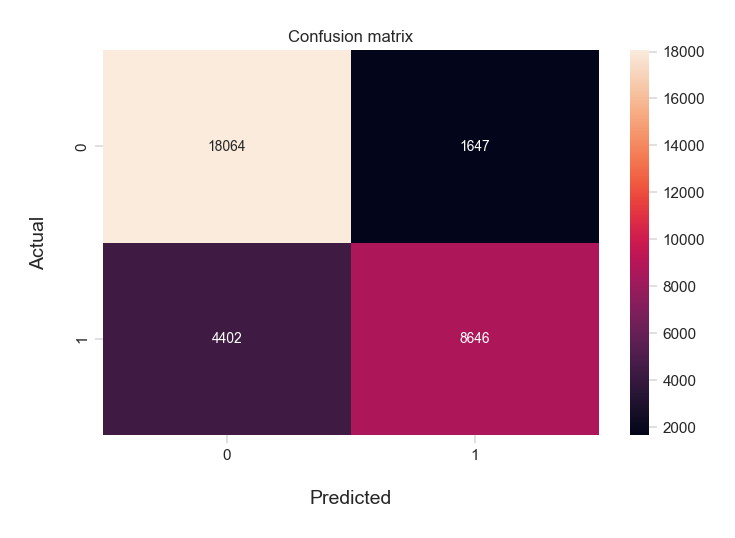

In [48]:
conf_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

In [49]:
def predict_viral(title):
    title_tfidf = tfidf.transform([title])
    score = model.predict(title_tfidf)[0]
    prob = model.predict_proba(title_tfidf)[0][1]
    print(f"Predicted: {"Viral" if score else "not Viral"} with probability {prob: .2f} ")


In [51]:
df.head()

,title,views,viral
0,WE WANT TO TALK ABOUT OUR MARRIAGE,748374,0
1,The Trump Presidency: Last Week Tonight with J...,2418783,1
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",3191434,1
3,Nickelback Lyrics: Real or Fake?,343168,0
4,I Dare You: GOING BALD!?,2095731,1


In [56]:
predict_viral("Lose 100 LBs, Win $250,00")


Predicted: not Viral with probability  0.41 
